In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from IPython.display import display

In [2]:
def func1(x,t):
    return(t-(x*x))

In [3]:
import math

def datagen(n, filename):
    dt=0.01
    tmax=450
    tau=2.0
    t=0

    while(abs(t-tmax) > (dt/2)):
        with open(f'{filename}', 'a') as f:
            f.write(str(t)+'\n')
            f.write(str(n)+'\n')
        n=n+dt*func1(n,t)
        t=t+dt
    

In [4]:
def datagen2(n, filename):
    dt=0.01
    tmax=450
    t=0
    n=0
    
    while(abs(t-tmax) > (dt/2)):
        with open(f'{filename}', 'a') as f:
            f.write(str(t)+'\n')
            f.write(str(n)+'\n')
        t=t+dt
        n=math.sqrt(t)

In [5]:
def datapreptime(d):
    i=0
    o1=[]
    while i < len(d):
        if (i%2)==0 or (i==0):
            o1.append(d[i])
        i=i+1
    
    return(np.concatenate(o1))

def dataprepvalue(d):
    i=0
    o1=[]
    while i < len(d):
        if (i%2)>0:
            o1.append(d[i])
        i=i+1
    
    return(np.concatenate(o1))

In [6]:
def plotec(data, data2, data3, data4, data6, filename):

    fig1 = plt.figure()
    ax1 = fig1.add_subplot()  
    
    l1, = ax1.plot(datapreptime(data), dataprepvalue(data))           
    l2, = ax1.plot(datapreptime(data2), dataprepvalue(data2))
    l3, = ax1.plot(datapreptime(data3), dataprepvalue(data3))
    l4, = ax1.plot(datapreptime(data4), dataprepvalue(data4))
    l6, = ax1.plot(datapreptime(data6), dataprepvalue(data6))
    
    ax1.set_xlim(0, 450)

    legend = (ax1.legend([l1, l2, l3, l4, l6], [3, 1, 0, -0.7, '√t']))
    ax1.get_legend().set_title("x0")

    plt.xlabel("Time (s)")
    plt.ylabel("x")
    plt.savefig(f"{filename}", format="svg")
    
    plt.show()

In [7]:
datagen(3, "e2data_x3.txt")

data=pd.read_csv("e2data_x3.txt", delimiter='\t', header=None)
data=data.to_numpy()

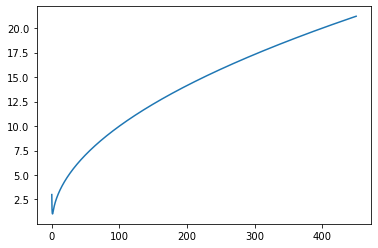

In [8]:
plt.plot(datapreptime(data), dataprepvalue(data))

In [9]:
datagen(1, "e2data_x1.txt")

data2=pd.read_csv("e2data_x1.txt", delimiter='\t', header=None)
data2=data2.to_numpy()

In [10]:
datagen(0, "e2data_x0.txt")

data3=pd.read_csv("e2data_x0.txt", delimiter='\t', header=None)
data3=data3.to_numpy()

In [11]:
datagen(-0.7, "e2data_x7.txt")

data4=pd.read_csv("e2data_x7.txt", delimiter='\t', header=None)
data4=data4.to_numpy()

In [12]:
datagen(-0.75, "e2data_x75.txt")

data5=pd.read_csv("e2data_x75.txt", delimiter='\t', header=None)
data5=data5.to_numpy()

In [13]:
datagen2(0, "e2data_time.txt")

data6=pd.read_csv("e2data_time.txt", delimiter='\t', header=None)
data6=data6.to_numpy()

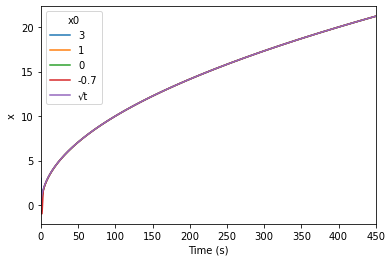

In [14]:
plotec(data, data2, data3, data4, data6, "e2_4.svg")